In [9]:
from top_down_sorting import *
from vis import *
import numpy as np
import pickle

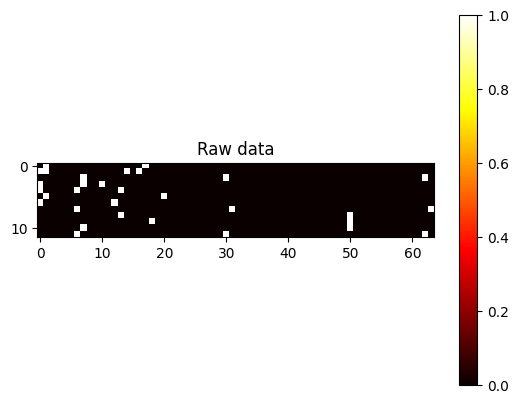

In [10]:
# Load raw data csr matrix
datafile = 'example2.pkl'
with open(datafile, "rb") as f:
    raw_csr : csr_matrix = pickle.load(f).tocsr()
perm = np.random.permutation(raw_csr.shape[0])
raw_csr = raw_csr[perm]
matrix_heatmap(raw_csr.toarray(), title='Raw data')

Starting m, n = (12, 64)
Links at n=1.0 : [[0, 1, 3, 4, 5, 6], [2, 7, 8, 9, 10, 11]]
Links at n=2 : [[3, 4, 6], [0, 1, 5], [2, 7, 11], [8, 10], [9]]
Links at n=4 : [[3, 4, 6], [0, 5], [1], [2, 7, 11], [10], [8], [9]]
Links at n=8 : [[3], [4], [6], [0], [5], [1], [2, 7, 11], [10], [8], [9]]
Links at n=16 : [[3], [4], [6], [0], [5], [1], [2, 7, 11], [10], [8], [9]]
Links at n=32 : [[3], [4], [6], [0], [5], [1], [11], [7], [2], [10], [8], [9]]


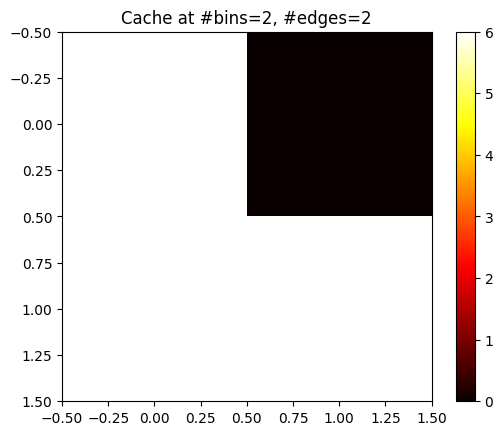

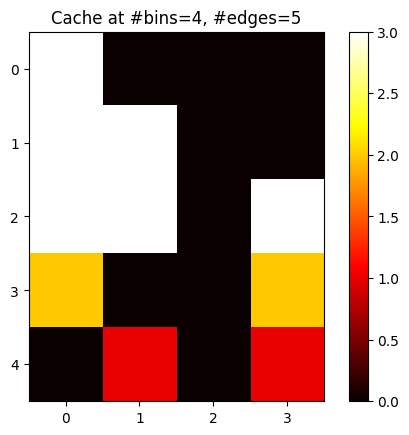

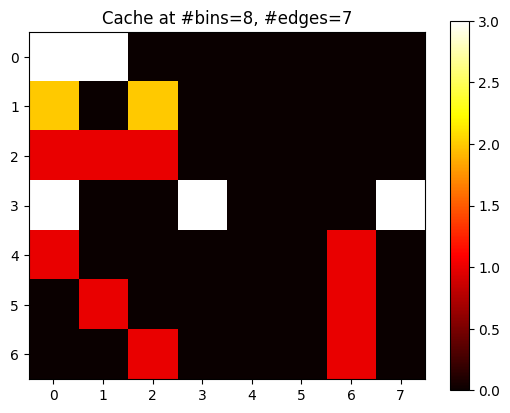

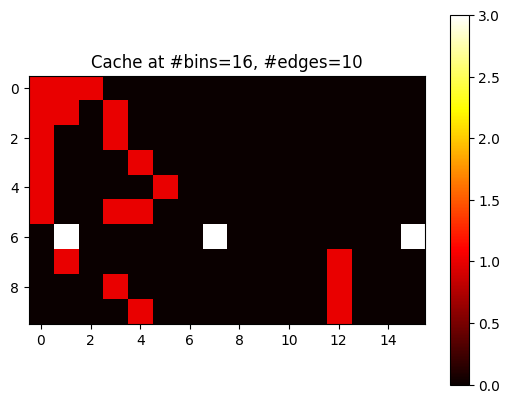

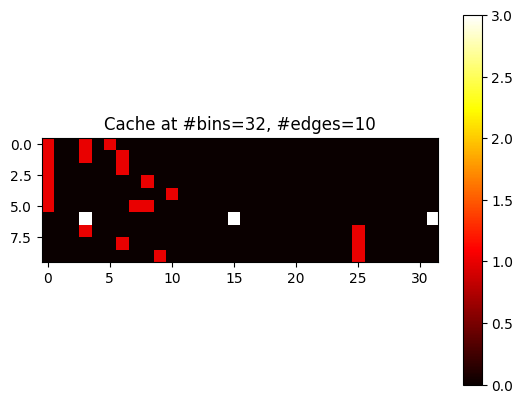

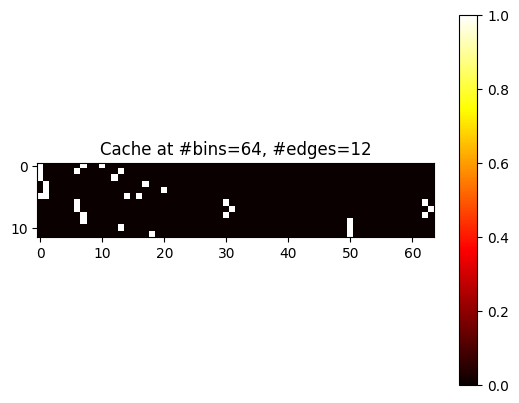

In [11]:
# Build heirarchical cache
m, n = raw_csr.shape
print(f'Starting m, n = {m, n}')
min_n, max_n = 2, n

raw_weights = np.ones(shape=(m,))
sorter = TopDownSorting(raw_csr.copy(), raw_weights)

for H, W, _ in sorter.build_cache((min_n, max_n)):
    current_m, current_n = H.shape
    matrix_heatmap(np.diag(W) @ H.toarray(), title=f'Cache at #bins={current_n}, #edges={current_m}')

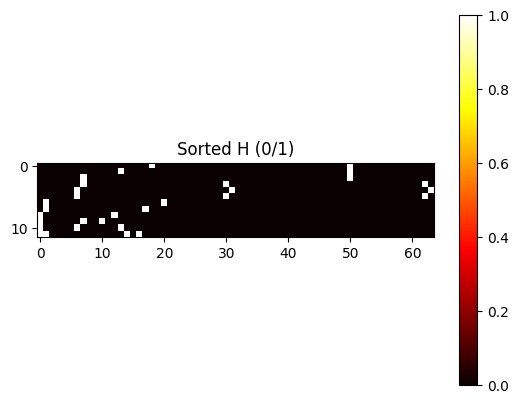

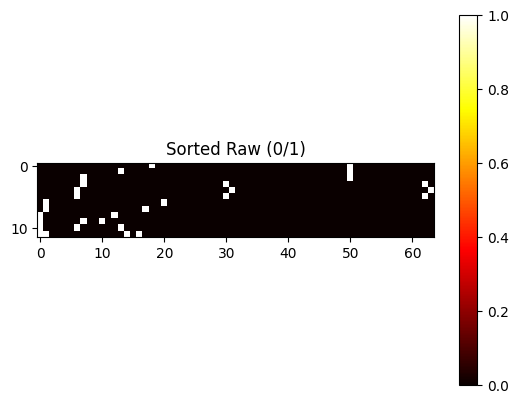

In [12]:
# Sanity check - highest resolution should lok like raw data

H_final = H.tocsr()
raw = raw_csr.tocsr()

#assert H_final.shape == raw.shape

H_rows = sorted(map(tuple, H_final.toarray()))
raw_rows = sorted(map(tuple, raw.toarray()))

H_sorted = np.array(H_rows)
raw_sorted = np.array(raw_rows)

matrix_heatmap(H_sorted, title="Sorted H (0/1)")
matrix_heatmap(raw_sorted, title="Sorted Raw (0/1)")
